In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt
from itertools import permutations
import sys

sys.setrecursionlimit(10000)

In [32]:
gamma = 0.5772156649   # Euler's constant
last_time = 0
bench = True


def benchmark(func):
    """Decorator for time-testing.
    
    Prints information about calculation time of function func.
    """

    def _benchmark(*args, **kwargs):
        global last_time
        t = time.time()
        res = func(*args, **kwargs)
        res_time = time.time() - t
        if bench:
            print("[*] function {} ended, time elapsed: {}".format(func.__name__,
                                                                   res_time))
        last_time = res_time
        return res

    return _benchmark


def generate_random_array(n):
    return [np.random.randint(n) for _ in range(n)]


def cache(func):
    
    _cache_dict = {}
    
    def _cache(*args, **kwargs):
        nonlocal _cache_dict
        if (str(args) + str(kwargs)) not in _cache_dict:
            _cache_dict[str(args) + str(kwargs)] = func(*args, **kwargs)
        return _cache_dict[str(args) + str(kwargs)]
    
    return _cache


# Task 1, 2

In [105]:
@benchmark
def calc_Cn1(n):
    if n < 1:
        return 0
    
    res_array = [0] * (n+1)
    for i in range(1, n + 1):
        res_array[i] = i + 2 + sum(res_array[k] + res_array[i-k] for k in range(1, i+1)) / i
    return res_array[n]


@benchmark
def calc_Cn2(n):
    if n == 0:
        return 0
    
    res = 0
    for i in range(1, n+1):
        res = (i + 1) / i * res + 2
    return res


@benchmark
def Cn_formula(n):
    return 2 * n * np.log(n)


@benchmark
def Cn_better_formula(n):
    return (2 * (np.log(n+1) + 1 / (2 * n + 2) + gamma) - 2) * (n + 1)

In [52]:
for n in [100, 1000, 10_000]:
    print(f'\nn = {n}')
    res1 = calc_Cn1(n)
    res2 = calc_Cn2(n)
    res3 = Cn_formula(n)
    res4 = Cn_better_formula(n)
    print(f"\nby recursion: {res1}, {res2};\n",
          f"approximation: {res3}, {res4};\n", 
          f"approximation error: {abs(res1 - res3)}, {abs(res1 - res4)}\n", sep='')


n = 100
[*] function calc_Cn1 ended, time elapsed: 0.001984119415283203
[*] function calc_Cn2 ended, time elapsed: 2.7894973754882812e-05
[*] function Cn_formula ended, time elapsed: 3.9577484130859375e-05
[*] function Cn_better_formula ended, time elapsed: 3.886222839355469e-05

by recursion: 847.8502585632029, 847.8502585632028;
approximation: 921.0340371976183, 847.8519087117343;
approximation error: 73.18377863441538, 0.0016501485313256126


n = 1000
[*] function calc_Cn1 ended, time elapsed: 0.09027767181396484
[*] function calc_Cn2 ended, time elapsed: 0.00012230873107910156
[*] function Cn_formula ended, time elapsed: 3.218650817871094e-05
[*] function Cn_better_formula ended, time elapsed: 1.1920928955078125e-05

by recursion: 12985.912662821765, 12985.91266282178;
approximation: 13815.510557964273, 12985.91282931887;
approximation error: 829.5978951425077, 0.0001664971041464014


n = 10000
[*] function calc_Cn1 ended, time elapsed: 7.592236518859863
[*] function calc_Cn2 ende

# Task 3

In [109]:
_count = 0   # amount of comparisons
_count2 = 0


@benchmark
def quick_sort(array, key=lambda a: a):
    """Realisation of QuickSort algorithm.
    
    It's non-recursive wrapper for recursive function below.
    :param array: array-like collection
    :param key: function for comparison
    """
    global _count, _count2
    _count = 0
    quick_sort_helper(array, 0, len(array) - 1, key)
    return _count, _count2


def quick_sort_helper(array, first, last, key=lambda a: a):
    """ Additional recursive function for sorting

    :param array: array-like collection
    :param first: left bound of sorting
    :param last: right bound of sorting
    :param key: function for comparison
    """
    if first < last:
        splitpoint = partition(array, first, last, key)
        
        quick_sort_helper(array, first, splitpoint - 1, key)
        quick_sort_helper(array, splitpoint + 1, last, key)


def partition(array, first, last, key=lambda a: a):
    """ Finds the point of splitting the array into 2.

    :param array: array-like collection
    :param first: left bound of sorting
    :param last: right bound of sorting
    :param key: function for comparison
    :return: Position (index) of splitting.
    """
    global _count, _count2
    pivot = array[first]      # fundamental element
    left = first + 1
    right = last
    done = False
    while not done:
        
        while left <= right and key(array[left]) <= key(pivot):
            left += 1
            _count += 2          # there were 1 comparisons above
        while key(array[right]) >= key(pivot) and right >= left:
            right -= 1
            _count += 2          # there were 1 comparisons above
        
        _count += 1
        if right < left:
            done = True
        else:
            _count2 += 1    # changing of elements (at least 3 operations)
            array[left], array[right] = array[right], array[left]

    _count2 += 1    # changing of elements (at least 3 operations)
    array[first], array[right] = array[right], array[first]
    return right

In [28]:
print("\nn = 10_000")
compar = quick_sort(generate_random_array(10_000))
res_time = last_time
bench = True


for n in [1e+5, 5*1e+5, 1e+6, 1e+7]:
    n = int(n)
    diff = n // 10_000
    print(f"\nexpected time for n={n}:", res_time*(diff + diff*np.log(diff) / np.log(n)))
    print("real time:")
    quick_sort(generate_random_array(n))



n = 10_000
[*] function quick_sort ended, time elapsed: 0.09262681007385254

expected time for n=100000: 1.1115217208862305
real time:
[*] function quick_sort ended, time elapsed: 1.020198106765747

expected time for n=500000: 6.0120301001729635
real time:
[*] function quick_sort ended, time elapsed: 5.799322128295898

expected time for n=1000000: 12.35024134318034
real time:
[*] function quick_sort ended, time elapsed: 11.761738538742065

expected time for n=10000000: 132.3240143912179
real time:
[*] function quick_sort ended, time elapsed: 150.881019115448


700
800
900
1000
1100
1200
1300


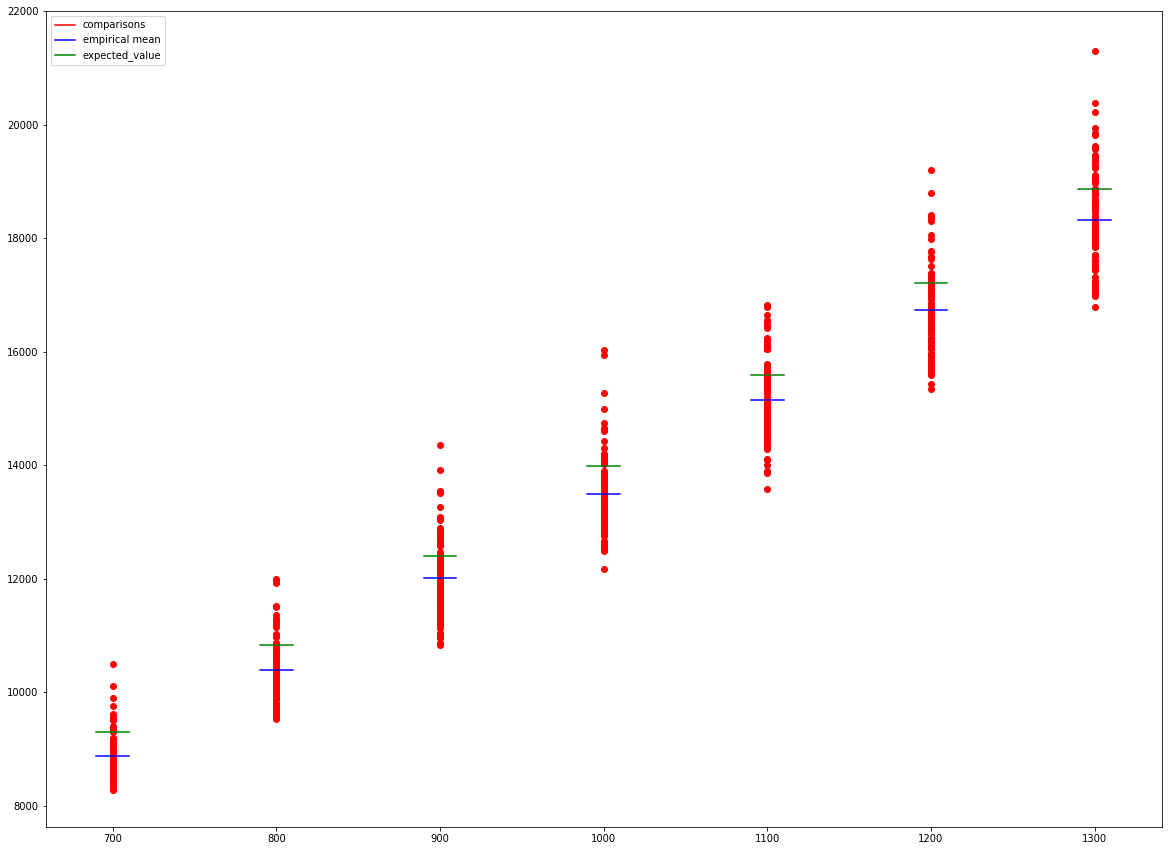

In [106]:

bench = False
m = 100

fig = plt.figure(figsize=(20, 15))
for n in [700, 800, 900, 1000, 1100, 1200, 1300]:
    print(n)
    comp_list = []

    for i in range(m):
        comp_list.append(quick_sort(generate_random_array(n))[0])

    comp_list = np.array(comp_list)
    mean = comp_list.mean()
    expected_value = calc_Cn1(n)
    x = [n for i in range(m)]

    plt.scatter(x, comp_list, color='r')
    plt.plot([n-10, n+10], [mean, mean], color='b')
    plt.plot([n-10, n+10], [expected_value, expected_value], color='g')

plt.plot([700], [10000], color='r', label='comparisons')
plt.plot([700], [10000], color='b', label='empirical mean')
plt.plot([700], [10000], color='g', label='expected_value')
plt.legend()
plt.show()
    

# Task 4

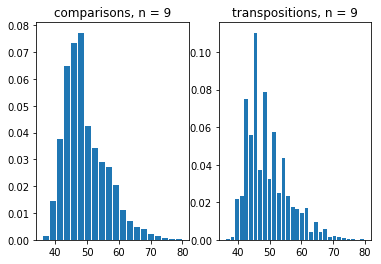

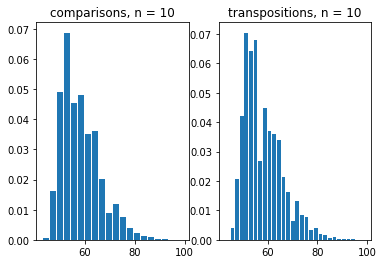

In [114]:
def create_dict_of_K(n):
    res = [quick_sort(list(el)) for el in permutations(range(n))]
    return res

for n in [9, 10]:
    tmp = create_dict_of_K(n)
    tmp1 = list(map(lambda a: a[0], tmp))
    tmp2 = list(map(lambda a: a[1], tmp))
    fig, ax = plt.subplots(221)
    plt.subplot(1, 2, 1, title='comparisons, n = {}'.format(n))
    plt.hist(tmp1, bins=20, rwidth=0.8, density=True)
    
    plt.subplot(1, 2, 2, title='transpositions, n = {}'.format(n))
    plt.hist(tmp1, bins=30, rwidth=0.8, density=True, label='transpositions, n={}'.format(n))
    plt.show()

# Task 5 - merge sort

In [54]:
_count2 = 0

@benchmark
def merge_sort_test(array):
    global _count2
    _count2 = 0
    merge_sort(array)
    return _count2


def merge_sort(array):
    """ Реалізує алгоритм сортування злиттям

    :param array: Масив (список однотипових елементів)
    :return: None
    """
    global _count2
    # print("Splitting ", array)
    if len(array) > 1:
        # Розбиття списку навпіл
        mid = len(array) // 2
        lefthalf = array[:mid]
        righthalf = array[mid:]

        # Рекурсивний виклик сортування
        # для кожної з половин
        merge_sort(lefthalf)
        merge_sort(righthalf)

        # Злиття двох відсортованих списків
        i = 0
        j = 0
        k = 0
        while i < len(lefthalf) and j < len(righthalf):
            _count2 += 2
            if lefthalf[i] < righthalf[j]:
                array[k] = lefthalf[i]
                i += 1
            else:
                array[k] = righthalf[j]
                j += 1
            k += 1

        while i < len(lefthalf):
            array[k] = lefthalf[i]
            i += 1
            k += 1

        while j < len(righthalf):
            array[k] = righthalf[j]
            j += 1
            k += 1


## Task 3 for merge sort

In [57]:
print("\nn = 10_000")
compar = merge_sort_test(generate_random_array(10_000))
res_time = last_time
bench = True


for n in [1e+5, 5*1e+5, 1e+6, 1e+7]:
    n = int(n)
    diff = n // 10_000
    print(f"\nexpected time for n={n}:", res_time*(diff + diff*np.log(diff) / np.log(n)))
    print("real time:")
    merge_sort_test(generate_random_array(n))



n = 10_000
[*] function merge_sort_test ended, time elapsed: 0.05793261528015137

expected time for n=100000: 0.6951913833618164
real time:
[*] function merge_sort_test ended, time elapsed: 0.7450039386749268

expected time for n=500000: 3.760170803337738
real time:
[*] function merge_sort_test ended, time elapsed: 4.417741298675537

expected time for n=1000000: 7.724348704020183
real time:
[*] function merge_sort_test ended, time elapsed: 10.42922067642212

expected time for n=10000000: 82.7608789716448
real time:
[*] function merge_sort_test ended, time elapsed: 116.44699358940125


700
800
900
1000
1100
1200
1300


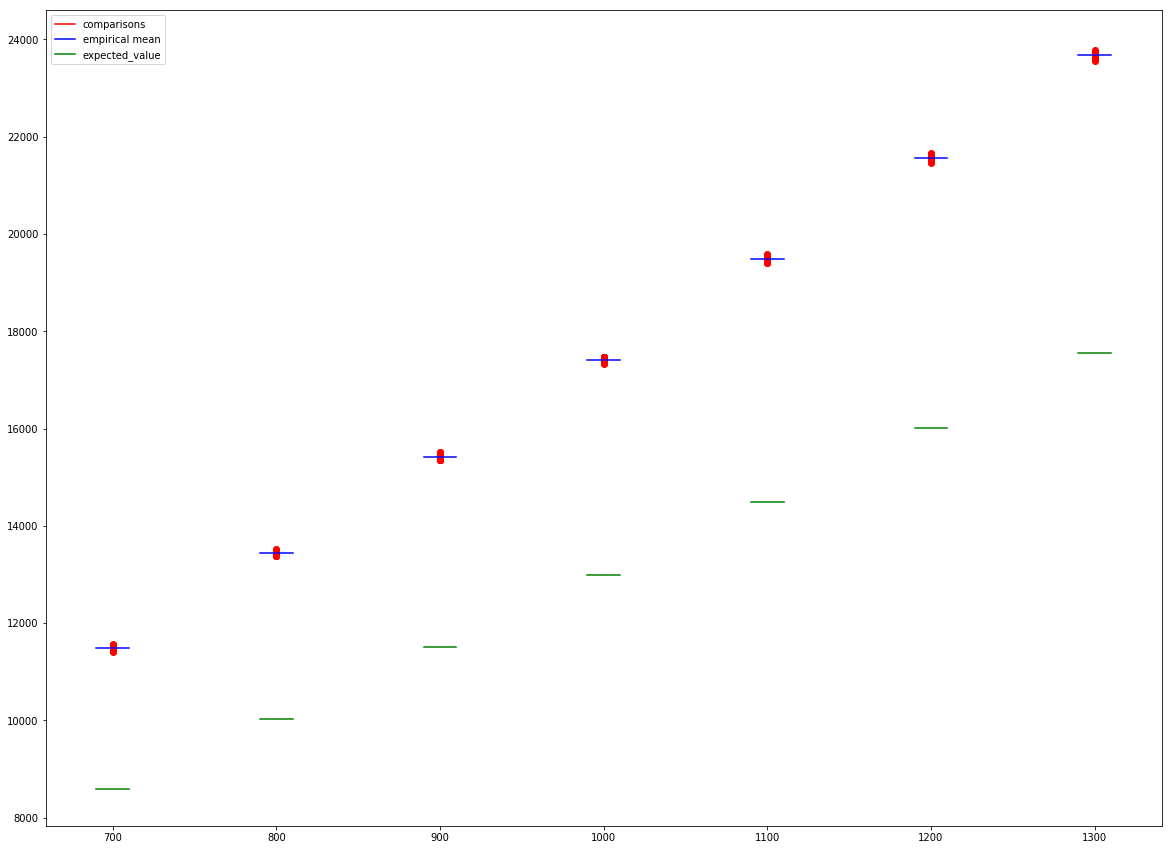

In [102]:

bench = False
m = 100

fig = plt.figure(figsize=(20, 15))
for n in [700, 800, 900, 1000, 1100, 1200, 1300]:
    print(n)
    comp_list = []

    for i in range(m):
        comp_list.append(merge_sort_test(generate_random_array(n)))

    comp_list = np.array(comp_list)
    mean = comp_list.mean()
    expected_value = n * np.floor(np.log(n)) + 2 * n - 2 ** (np.floor)
    x = [n for i in range(m)]

    plt.scatter(x, comp_list, color='r')
    plt.plot([n-10, n+10], [mean, mean], color='b')
    plt.plot([n-10, n+10], [expected_value, expected_value], color='g')

plt.plot([700], [10000], color='r', label='comparisons')
plt.plot([700], [10000], color='b', label='empirical mean')
plt.plot([700], [10000], color='g', label='expected_value')
plt.legend()
plt.show()

## Task 4 for merge_sort

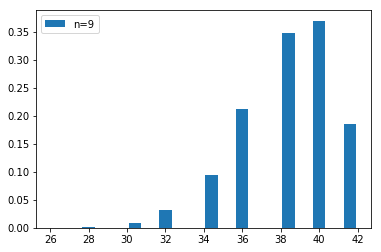

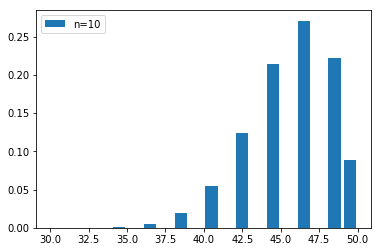

In [60]:
def create_dict_of_K2(n):
    res = [merge_sort_test(list(el)) for el in permutations(range(n))]
    return res


for n in [9, 10]:
    plt.hist(create_dict_of_K2(n), bins=20, rwidth=0.8, density=True, label='n={}'.format(n))
    plt.legend()
    plt.show()